<a href="https://colab.research.google.com/github/nandani537/MLassignment1/blob/main/MLassign1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tensorflow
import tensorflow as tf  # for CNN model (tf.keras)

# Scikit-learn
from sklearn.tree import DecisionTreeRegressor  # for Decision Tree Regressor
from sklearn.linear_model import LinearRegression  # for Linear Regressoion
from sklearn.metrics import mean_squared_error  # to measure mean squared error (MSE)
from sklearn.preprocessing import StandardScaler  # to standardize the features

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Input, Reshape


**Loading the Data**
Before performing any data preprocessing or model training, we begin by loading the dataset and conducting an initial inspection.

**Steps:**
Load the dataset: We read the weather data from a CSV file using pandas.
Check data types: Displaying column data types helps us understand the structure of the dataset.
Inspect the first data point: We print all feature values of the first record to get an overview of the dataset content.
Check dataset dimensions: The dataset shape is printed to determine the number of rows and columns.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/weather_data.csv'

In [ ]:
data = pd.read_csv(file_path)

In [ ]:
data.head(5)

,Observation station,Year,Month,Day,Time [Local time],Average temperature [°C],Maximum temperature [°C],Minimum temperature [°C],Average relative humidity [%],Wind speed [m/s],Maximum wind speed [m/s],Average wind direction [°],Maximum gust speed [m/s],Precipitation [mm],Average air pressure [hPa]
0,Kustavi Isokari,2023,4,1,00:00,-0.6,-0.4,-0.8,82,6,6.4,15,7.6,0.0,1007.5
1,Kustavi Isokari,2023,4,1,01:00,-0.7,-0.4,-1.0,84,5.3,5.7,30,6.4,0.0,1007.8
2,Kustavi Isokari,2023,4,1,02:00,-1.0,-0.9,-1.1,80,5.6,6.2,27,6.9,0.0,1007.9
3,Kustavi Isokari,2023,4,1,03:00,-1.2,-1.0,-1.5,78,5.4,6,23,6.7,0.0,1008.2
4,Kustavi Isokari,2023,4,1,04:00,-1.0,-0.8,-1.3,77,6.3,7.4,17,8.5,0.0,1008.4


In [ ]:
data.tail(5)

,Observation station,Year,Month,Day,Time [Local time],Average temperature [°C],Maximum temperature [°C],Minimum temperature [°C],Average relative humidity [%],Wind speed [m/s],Maximum wind speed [m/s],Average wind direction [°],Maximum gust speed [m/s],Precipitation [mm],Average air pressure [hPa]
715,Kustavi Isokari,2023,4,30,19:00,5.3,5.8,5.0,72,5.7,6.6,270,8.7,0.0,1011.9
716,Kustavi Isokari,2023,4,30,20:00,5.4,5.6,5.1,67,4.5,5,253,7.1,0.0,1012.0
717,Kustavi Isokari,2023,4,30,21:00,4.7,5.4,4.5,72,5,5.7,235,7.9,0.0,1012.3
718,Kustavi Isokari,2023,4,30,22:00,4.7,4.9,4.6,70,6.9,7.4,247,9.9,0.0,1012.4
719,Kustavi Isokari,2023,4,30,23:00,5.0,5.1,4.8,72,6.5,7.1,236,10,0.0,1012.6


In [ ]:
data.iloc[0]

,0
Observation station,Kustavi Isokari
Year,2023
Month,4
Day,1
Time [Local time],00:00
Average temperature [°C],-0.6
Maximum temperature [°C],-0.4
Minimum temperature [°C],-0.8
Average relative humidity [%],82
Wind speed [m/s],6


In [ ]:
data.shape

(720, 15)

**Data Points**
A data point corresponds to a specific hour, e.g., 06-April-2023 from 06:00 - 07:00, which is recorded as 2023-04-06 06:00:00 (starting time) after preprocessing.

Features include all hourly observations from the previous 5 hours. Example: For the data point 2023-04-06 06:00:00, the features correspond to data from 01:00 - 06:00 on the same day.

Label is the temperature recorded 5 hours ahead. Example: For the data point 2023-04-06 06:00:00, the label corresponds to the temperature measured during 11:00 - 12:00.

**Dataset Splits:**

Training Set: Includes data from 2023-04-06 00:00:00 to 2023-04-08 00:00:00.
Validation Set: Comprises the remaining hours of 2023.

In [ ]:
newdata = data.copy()

In [ ]:
newdata

,Observation station,Year,Month,Day,Time [Local time],Average temperature [°C],Maximum temperature [°C],Minimum temperature [°C],Average relative humidity [%],Wind speed [m/s],Maximum wind speed [m/s],Average wind direction [°],Maximum gust speed [m/s],Precipitation [mm],Average air pressure [hPa]
0,Kustavi Isokari,2023,4,1,00:00,-0.6,-0.4,-0.8,82,6,6.4,15,7.6,0.0,1007.5
1,Kustavi Isokari,2023,4,1,01:00,-0.7,-0.4,-1.0,84,5.3,5.7,30,6.4,0.0,1007.8
2,Kustavi Isokari,2023,4,1,02:00,-1.0,-0.9,-1.1,80,5.6,6.2,27,6.9,0.0,1007.9
3,Kustavi Isokari,2023,4,1,03:00,-1.2,-1.0,-1.5,78,5.4,6,23,6.7,0.0,1008.2
4,Kustavi Isokari,2023,4,1,04:00,-1.0,-0.8,-1.3,77,6.3,7.4,17,8.5,0.0,1008.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,Kustavi Isokari,2023,4,30,19:00,5.3,5.8,5.0,72,5.7,6.6,270,8.7,0.0,1011.9
716,Kustavi Isokari,2023,4,30,20:00,5.4,5.6,5.1,67,4.5,5,253,7.1,0.0,1012.0
717,Kustavi Isokari,2023,4,30,21:00,4.7,5.4,4.5,72,5,5.7,235,7.9,0.0,1012.3
718,Kustavi Isokari,2023,4,30,22:00,4.7,4.9,4.6,70,6.9,7.4,247,9.9,0.0,1012.4


In [ ]:
## Convert specific column to numeric
numeric_columns = [
    'Wind speed [m/s]',
    'Maximum wind speed [m/s]',
    'Average wind direction [°]',
    'Maximum gust speed [m/s]'
]

data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [ ]:
## Check missing values
newdata.isnull()
newdata.isnull().sum()

,0
Observation station,0
Year,0
Month,0
Day,0
Time [Local time],0
Average temperature [°C],0
Maximum temperature [°C],0
Minimum temperature [°C],0
Average relative humidity [%],0
Wind speed [m/s],0


In [ ]:
## fill missing values with 0

newdata.fillna(0, inplace=True)

In [ ]:
## Creating a timestamp by combining column year, month, and day

newdata['timestamp'] = pd.to_datetime(
    data['Year'].astype(str) + '-' +
    data['Month'].astype(str) + '-' +
    data['Day'].astype(str) + ' ' +
    data['Time [Local time]']
)
newdata

,Observation station,Year,Month,Day,Time [Local time],Average temperature [°C],Maximum temperature [°C],Minimum temperature [°C],Average relative humidity [%],Wind speed [m/s],Maximum wind speed [m/s],Average wind direction [°],Maximum gust speed [m/s],Precipitation [mm],Average air pressure [hPa],timestamp
0,Kustavi Isokari,2023,4,1,00:00,-0.6,-0.4,-0.8,82,6,6.4,15,7.6,0.0,1007.5,2023-04-01 00:00:00
1,Kustavi Isokari,2023,4,1,01:00,-0.7,-0.4,-1.0,84,5.3,5.7,30,6.4,0.0,1007.8,2023-04-01 01:00:00
2,Kustavi Isokari,2023,4,1,02:00,-1.0,-0.9,-1.1,80,5.6,6.2,27,6.9,0.0,1007.9,2023-04-01 02:00:00
3,Kustavi Isokari,2023,4,1,03:00,-1.2,-1.0,-1.5,78,5.4,6,23,6.7,0.0,1008.2,2023-04-01 03:00:00
4,Kustavi Isokari,2023,4,1,04:00,-1.0,-0.8,-1.3,77,6.3,7.4,17,8.5,0.0,1008.4,2023-04-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,Kustavi Isokari,2023,4,30,19:00,5.3,5.8,5.0,72,5.7,6.6,270,8.7,0.0,1011.9,2023-04-30 19:00:00
716,Kustavi Isokari,2023,4,30,20:00,5.4,5.6,5.1,67,4.5,5,253,7.1,0.0,1012.0,2023-04-30 20:00:00
717,Kustavi Isokari,2023,4,30,21:00,4.7,5.4,4.5,72,5,5.7,235,7.9,0.0,1012.3,2023-04-30 21:00:00
718,Kustavi Isokari,2023,4,30,22:00,4.7,4.9,4.6,70,6.9,7.4,247,9.9,0.0,1012.4,2023-04-30 22:00:00


In [ ]:
## Identify columns for lagged features (excluding non-relevant ones)
excluded_columns = ['Observation station', 'timestamp', 'Year', 'Month', 'Day', 'Time [Local time]']
columns_to_lag = [col for col in newdata.columns if col not in excluded_columns]
newdata.head(5)

,Observation station,Year,Month,Day,Time [Local time],Average temperature [°C],Maximum temperature [°C],Minimum temperature [°C],Average relative humidity [%],Wind speed [m/s],Maximum wind speed [m/s],Average wind direction [°],Maximum gust speed [m/s],Precipitation [mm],Average air pressure [hPa],timestamp
0,Kustavi Isokari,2023,4,1,00:00,-0.6,-0.4,-0.8,82,6,6.4,15,7.6,0.0,1007.5,2023-04-01 00:00:00
1,Kustavi Isokari,2023,4,1,01:00,-0.7,-0.4,-1.0,84,5.3,5.7,30,6.4,0.0,1007.8,2023-04-01 01:00:00
2,Kustavi Isokari,2023,4,1,02:00,-1.0,-0.9,-1.1,80,5.6,6.2,27,6.9,0.0,1007.9,2023-04-01 02:00:00
3,Kustavi Isokari,2023,4,1,03:00,-1.2,-1.0,-1.5,78,5.4,6,23,6.7,0.0,1008.2,2023-04-01 03:00:00
4,Kustavi Isokari,2023,4,1,04:00,-1.0,-0.8,-1.3,77,6.3,7.4,17,8.5,0.0,1008.4,2023-04-01 04:00:00


In [ ]:
## Create lagged features for the previous 5 hours
for lag in range(1, 6):
    for col in columns_to_lag:
        newdata[f"{col} lag_{lag}"] = newdata[col].shift(lag)

In [ ]:
## Define target variable (y) as the average temperature 5 hours ahead
newdata['y'] = newdata['Average temperature [°C]'].shift(-5)

In [ ]:
## Drop rows with NaN values caused by shifts
newdata.dropna(inplace=True)

In [ ]:
## Print dataset shape
print(f"Data shape: {newdata.shape}")
newdata.head(5)

Data shape: (710, 67)


,Observation station,Year,Month,Day,Time [Local time],Average temperature [°C],Maximum temperature [°C],Minimum temperature [°C],Average relative humidity [%],Wind speed [m/s],...,Maximum temperature [°C] lag_5,Minimum temperature [°C] lag_5,Average relative humidity [%] lag_5,Wind speed [m/s] lag_5,Maximum wind speed [m/s] lag_5,Average wind direction [°] lag_5,Maximum gust speed [m/s] lag_5,Precipitation [mm] lag_5,Average air pressure [hPa] lag_5,y
5,Kustavi Isokari,2023,4,1,05:00,-1.0,-0.9,-1.2,75,7,...,-0.4,-0.8,82.0,6,6.4,15,7.6,0.0,1007.5,-0.9
6,Kustavi Isokari,2023,4,1,06:00,-1.4,-1.1,-1.7,72,5.8,...,-0.4,-1.0,84.0,5.3,5.7,30,6.4,0.0,1007.8,-0.2
7,Kustavi Isokari,2023,4,1,07:00,-1.7,-1.5,-1.8,72,6.2,...,-0.9,-1.1,80.0,5.6,6.2,27,6.9,0.0,1007.9,-0.1
8,Kustavi Isokari,2023,4,1,08:00,-1.5,-1.4,-1.7,71,6.5,...,-1.0,-1.5,78.0,5.4,6,23,6.7,0.0,1008.2,0.1
9,Kustavi Isokari,2023,4,1,09:00,-1.4,-1.2,-1.6,69,5.3,...,-0.8,-1.3,77.0,6.3,7.4,17,8.5,0.0,1008.4,0.6


In [ ]:
## Sanity checks

## Check the data rows number
assert newdata.shape[0] == 710, f"Unexpected number of rows: {newdata.shape[0]}."

print('Sanity check passed!')

Sanity check passed!


**TASK 1.1:** Split the Data into Training and Validation Sets


**Task Description:**
Split the dataset into training (X_train, y_train) and validation (X_val, y_val) sets based on the specified time range.
Training Set: Includes data from hours 2023-04-06 00:00:00 to (and including) 2023-04-08 00:00:00.
Validation Set: Consists of the remaining data.

In [ ]:
## Time ranges defined for splitting
train_start = '2023-04-06 00:00:00'
train_end = '2023-04-08 00:00:00'

## Splitting the data into training and validation sets based on the timeranges
train_data = newdata[(newdata['timestamp'] >= train_start) & (newdata['timestamp'] <= train_end)]
val_data = newdata[newdata['timestamp'] > train_end]

## Check the lagged feature columns
lagged_columns = [col for col in newdata.columns if "lag" in col]

## Create the target column
target_column = 'y'


## Assign lagged columns as the feature variables for X_train and X_val
X_train = train_data[lagged_columns]
y_train = train_data[target_column]

X_val = val_data[lagged_columns]
y_val = val_data[target_column]


## Print the shapes of training and validation
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}, X_val: {X_val.shape}, y_val: {y_val.shape}")



X_train: (49, 50), y_train: (49,), X_val: (546, 50), y_val: (546,)


In [ ]:
print(X_train.dtypes)
print(X_val.dtypes)

Average temperature [°C] lag_1         float64
Maximum temperature [°C] lag_1         float64
Minimum temperature [°C] lag_1         float64
Average relative humidity [%] lag_1    float64
Wind speed [m/s] lag_1                  object
Maximum wind speed [m/s] lag_1          object
Average wind direction [°] lag_1        object
Maximum gust speed [m/s] lag_1          object
Precipitation [mm] lag_1               float64
Average air pressure [hPa] lag_1       float64
Average temperature [°C] lag_2         float64
Maximum temperature [°C] lag_2         float64
Minimum temperature [°C] lag_2         float64
Average relative humidity [%] lag_2    float64
Wind speed [m/s] lag_2                  object
Maximum wind speed [m/s] lag_2          object
Average wind direction [°] lag_2        object
Maximum gust speed [m/s] lag_2          object
Precipitation [mm] lag_2               float64
Average air pressure [hPa] lag_2       float64
Average temperature [°C] lag_3         float64
Maximum tempe

In [ ]:
print(X_train.isnull().sum().sum(), y_train.isnull().sum())
print(X_val.isnull().sum().sum(), y_val.isnull().sum())


0 0
0 0


In [ ]:
# Sanity checks

# Check the data rows number
assert X_train.shape[0] == 49, f"Unexpected number of rows for X_train: {X_train.shape[0]}."
assert X_val.shape[0] == 546, f"Unexpected number of rows for X_val: {X_val.shape[0]}."

print('Sanity check passed!')

Sanity check passed!


In [ ]:
# Create a copy of X_val and X_train before replacing non-numeric values
X_val = X_val.copy()
X_train = X_train.copy()

In [ ]:
print(X_val.isnull().sum())
print(X_train.isnull().sum())


Average temperature [°C] lag_1         0
Maximum temperature [°C] lag_1         0
Minimum temperature [°C] lag_1         0
Average relative humidity [%] lag_1    0
Wind speed [m/s] lag_1                 0
Maximum wind speed [m/s] lag_1         0
Average wind direction [°] lag_1       0
Maximum gust speed [m/s] lag_1         0
Precipitation [mm] lag_1               0
Average air pressure [hPa] lag_1       0
Average temperature [°C] lag_2         0
Maximum temperature [°C] lag_2         0
Minimum temperature [°C] lag_2         0
Average relative humidity [%] lag_2    0
Wind speed [m/s] lag_2                 0
Maximum wind speed [m/s] lag_2         0
Average wind direction [°] lag_2       0
Maximum gust speed [m/s] lag_2         0
Precipitation [mm] lag_2               0
Average air pressure [hPa] lag_2       0
Average temperature [°C] lag_3         0
Maximum temperature [°C] lag_3         0
Minimum temperature [°C] lag_3         0
Average relative humidity [%] lag_3    0
Wind speed [m/s]

In [ ]:
# Check for missing values in X_train
missing_values_train = X_train.isnull().sum()
print("Missing values in X_train:")
print(missing_values_train)

Missing values in X_train:
Average temperature [°C] lag_1         0
Maximum temperature [°C] lag_1         0
Minimum temperature [°C] lag_1         0
Average relative humidity [%] lag_1    0
Wind speed [m/s] lag_1                 0
Maximum wind speed [m/s] lag_1         0
Average wind direction [°] lag_1       0
Maximum gust speed [m/s] lag_1         0
Precipitation [mm] lag_1               0
Average air pressure [hPa] lag_1       0
Average temperature [°C] lag_2         0
Maximum temperature [°C] lag_2         0
Minimum temperature [°C] lag_2         0
Average relative humidity [%] lag_2    0
Wind speed [m/s] lag_2                 0
Maximum wind speed [m/s] lag_2         0
Average wind direction [°] lag_2       0
Maximum gust speed [m/s] lag_2         0
Precipitation [mm] lag_2               0
Average air pressure [hPa] lag_2       0
Average temperature [°C] lag_3         0
Maximum temperature [°C] lag_3         0
Minimum temperature [°C] lag_3         0
Average relative humidity [%] 

In [ ]:
# Check for missing values in X_val
missing_values_val = X_val.isnull().sum()
print("Missing values in X_val:")
print(missing_values_val)

Missing values in X_val:
Average temperature [°C] lag_1         0
Maximum temperature [°C] lag_1         0
Minimum temperature [°C] lag_1         0
Average relative humidity [%] lag_1    0
Wind speed [m/s] lag_1                 0
Maximum wind speed [m/s] lag_1         0
Average wind direction [°] lag_1       0
Maximum gust speed [m/s] lag_1         0
Precipitation [mm] lag_1               0
Average air pressure [hPa] lag_1       0
Average temperature [°C] lag_2         0
Maximum temperature [°C] lag_2         0
Minimum temperature [°C] lag_2         0
Average relative humidity [%] lag_2    0
Wind speed [m/s] lag_2                 0
Maximum wind speed [m/s] lag_2         0
Average wind direction [°] lag_2       0
Maximum gust speed [m/s] lag_2         0
Precipitation [mm] lag_2               0
Average air pressure [hPa] lag_2       0
Average temperature [°C] lag_3         0
Maximum temperature [°C] lag_3         0
Minimum temperature [°C] lag_3         0
Average relative humidity [%] la

In [ ]:
total_missing_values = X_val.isnull().sum().sum()
total_missing_values

0

In [ ]:
# Select only numeric columns
numeric_columns = X_val.select_dtypes(include=[np.number]).columns

# Impute missing values with the mean for numeric columns only
X_val[numeric_columns] = X_val[numeric_columns].fillna(X_val[numeric_columns].mean())


In [ ]:
# For categorical columns, use mode imputation
# Identify categorical columns in X_val
categorical_columns = X_val.select_dtypes(include=['object', 'category']).columns

for column in categorical_columns:
    X_val[column] = X_val[column].fillna(X_val[column].mode()[0])


In [ ]:
# Import the required library for feature scaling
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
# This ensures that the mean is 0 and the standard deviation is 1 for each feature in X_train
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
non_numeric_columns = X_val.columns[X_val.applymap(lambda x: isinstance(x, str) and x == '-').any()]
print("Columns with non-numeric values ('-'):", non_numeric_columns)


Columns with non-numeric values ('-'): Index(['Wind speed [m/s] lag_1', 'Maximum wind speed [m/s] lag_1',
       'Average wind direction [°] lag_1', 'Maximum gust speed [m/s] lag_1',
       'Wind speed [m/s] lag_2', 'Maximum wind speed [m/s] lag_2',
       'Average wind direction [°] lag_2', 'Maximum gust speed [m/s] lag_2',
       'Wind speed [m/s] lag_3', 'Maximum wind speed [m/s] lag_3',
       'Average wind direction [°] lag_3', 'Maximum gust speed [m/s] lag_3',
       'Wind speed [m/s] lag_4', 'Maximum wind speed [m/s] lag_4',
       'Average wind direction [°] lag_4', 'Maximum gust speed [m/s] lag_4',
       'Wind speed [m/s] lag_5', 'Maximum wind speed [m/s] lag_5',
       'Average wind direction [°] lag_5', 'Maximum gust speed [m/s] lag_5'],
      dtype='object')


<ipython-input-34-f03cfc4fef12>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  non_numeric_columns = X_val.columns[X_val.applymap(lambda x: isinstance(x, str) and x == '-').any()]


In [ ]:
# Replace '-' with NaN
X_val.replace('-', np.nan, inplace=True)

# Impute the missing values
numeric_columns = X_val.select_dtypes(include=[np.number]).columns
X_val[numeric_columns] = X_val[numeric_columns].fillna(X_val[numeric_columns].mean())


In [ ]:
X_val = X_val.apply(pd.to_numeric, errors='coerce')


In [ ]:
print("Missing values in X_val_scaled:", np.isnan(X_val_scaled).sum())


Missing values in X_val_scaled: 20


In [ ]:
# Reimpute missing values for X_val
X_val.fillna(X_val.mean(), inplace=True)



In [ ]:
# Import the required library for feature scaling
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
# This ensures that the mean is 0 and the standard deviation is 1 for each feature in X_train
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
# Apply the same transformation to the validation set
# We use transform() instead of fit_transform() to ensure the same scaling parameters from X_train are applied
X_val_scaled = scaler.transform(X_val)

# Set random seed for NumPy to ensure reproducibility in any random operations
np.random.seed(42)

# Set random seed for TensorFlow to ensure reproducibility in model training and initialization
tf.random.set_seed(42)

**TASK 1.2: Linear Regression**

**Task Overview:**
Now that we have standardized our features to ensure proper scaling, we can proceed with training our first machine learning model. In this task, you will implement and evaluate a linear regression model using the standardized training and validation datasets.

In [ ]:
# Linear Regression model
model = LinearRegression()

# Train the model using the scaled training data (X_train_scaled and y_train)
model.fit(X_train_scaled, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train_scaled)

# Make predictions on the validation set
y_val_pred = model.predict(X_val_scaled)

# Compute Mean Squared Error for both training and validation sets
reg_train_error = mean_squared_error(y_train, y_train_pred)
reg_val_error = mean_squared_error(y_val, y_val_pred)

In [ ]:
# Display results
print("\n*************** Linear Regression Diagnosis ***************")
print(f"Training Error (MSE): {reg_train_error:.4f}")
print(f"Validation Error (MSE): {reg_val_error:.4f}")


*************** Linear Regression Diagnosis ***************
Training Error (MSE): 0.0000
Validation Error (MSE): 22.3561


In [ ]:
# Sanity Checks: Ensuring Correctness of Model Evaluation

# Check if computed errors are numeric values
assert isinstance(reg_train_error, float), "Error: reg_train_error must be a numeric value."
assert isinstance(reg_val_error, float), "Error: reg_val_error must be a numeric value."

print("Sanity check passed! The computed errors are valid numerical values.")

Sanity check passed! The computed errors are valid numerical values.


TASK 1.3: Convolutional Neural Network (CNN)
Task Overview:
Now that we have trained a linear regression model, let's explore a more powerful approach: a 1D Convolutional Neural Network (CNN). CNNs are well-suited for sequential data as they can capture local patterns and temporal dependencies.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Input, Reshape

# Reshaped input data for 1D CNN (add a channel dimension)
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_val_cnn = X_val_scaled.reshape(X_val_scaled.shape[0], X_val_scaled.shape[1], 1)

# CNN model architecture
cnn_model = Sequential([
    Input(shape=(X_train_scaled.shape[1], 1)),  # Input layer with shape (features, 1)
    Conv1D(filters=64, kernel_size=3, activation='relu'),  # First Conv1D layer
    Conv1D(filters=32, kernel_size=3, activation='relu'),  # Second Conv1D layer
    Flatten(),  # Flatten the output of Conv layers
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compiling the model
cnn_model.compile(optimizer='adam', loss='mse')

# Training the model
cnn_model.fit(X_train_cnn, y_train, epochs=20, batch_size=32, validation_data=(X_val_cnn, y_val), verbose=1)

# Evaluating model performance
cnn_train_error = cnn_model.evaluate(X_train_cnn, y_train, verbose=0)
cnn_val_error = cnn_model.evaluate(X_val_cnn, y_val, verbose=0)

# Display results
print("\n*************** CNN Model Diagnosis ***************")
print(f"Training Error (MSE): {cnn_val_error:.4f}")
print(f"Validation Error (MSE): {cnn_val_error:.4f}")


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 417ms/step - loss: 2.1815 - val_loss: 5.9078
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 1.0000 - val_loss: 19.3296
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.5897 - val_loss: 43.1084
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 0.6021 - val_loss: 46.9325
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.4418 - val_loss: 34.2689
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 0.2095 - val_loss: 20.5203
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - loss: 0.0972 - val_loss: 12.4853
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 0.1065 - val_loss: 9.2434
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - loss: 0.1464 - val_loss: 8.2471
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - loss: 0.1631 - val_loss: 7.9933
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - loss: 0.1544 - val_loss: 8.0064
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - loss: 0.1343 - 

In [ ]:
# Sanity checks

# Check if the variables store numeric values
assert isinstance(cnn_train_error, float), "cnn_train_error must be a numeric value."
assert isinstance(cnn_val_error, float), "cnn_val_error must be a numeric value."

print('Sanity check passed!')

Sanity check passed!


**TASK 1.4**: Decision Tree Regressor


**Task Overview:**
Building on our previous models, we will now implement a Decision Tree Regressor, a non-parametric model that can capture nonlinear relationships in the data.

**Task Instructions:**
Train a Decision Tree Regressor using X_train_scaled as input features with max_depth=3.
Compute Mean Squared Error (MSE) for training (X_train_scaled,y_train) and validation (X_val_scaled,y_val) sets.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train the Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(max_depth=3)
tree_regressor.fit(X_train_scaled, y_train)

# Predict on training and validation sets
train_predictions = tree_regressor.predict(X_train_scaled)
val_predictions = tree_regressor.predict(X_val_scaled)

# Calculate Mean Squared Error
tree_train_error = mean_squared_error(y_train, train_predictions)
tree_val_error = mean_squared_error(y_val, val_predictions)

# Display results
print("\n*************** Decision Tree Regressor Diagnosis ***************")
print(f"Training Error (MSE): {tree_train_error:.4f}")
print(f"Validation Error (MSE): {tree_val_error:.4f}")



*************** Decision Tree Regressor Diagnosis ***************
Training Error (MSE): 0.0238
Validation Error (MSE): 12.1720


In [ ]:
# Sanity checks

# Check if the variables store numeric values
assert isinstance(tree_train_error, float), "tree_train_error must be a numeric value."
assert isinstance(tree_val_error, float), "tree_val_error must be a numeric value."

print('Sanity check passed!')

Sanity check passed!


Implementing the Ridge Penalty with Data Augmentation
To implement ridge regularization, we will:

Generate an augmented training set using independent and identically distributed (i.i.d.) Gaussian random vectors.
Set the labels for this augmented data to 0.
Modify our existing models (Linear Regression, CNN, and Decision Tree) to incorporate this augmented dataset.
This approach introduces a penalty term, encouraging models to keep their predictions closer to zero for these artificial data points, thus improving stability and reducing overfitting.

In [ ]:
def generate_augmented_dataset(X_train, y_train, augmentation_ratio=0.5, random_seed=42):
    """
    Generates an augmented training set by adding synthetic data points drawn from a Gaussian distribution.

    Parameters:
    - X_train (numpy array or DataFrame): Original training feature set.
    - y_train (numpy array or Series): Original training labels.
    - augmentation_ratio (float): Ratio of synthetic samples to real training samples (default: 0.5).
    - random_seed (int): Random seed for reproducibility.

    Returns:
    - X_train_aug (numpy array): Augmented feature set.
    - y_train_aug (numpy array): Augmented labels (including original and synthetic samples).
    """

    # Set random seed for full reproducibility
    np.random.seed(random_seed)
    tf.random.set_seed(random_seed)  # Ensure reproducibility in TensorFlow if used later

    # Determine the number of augmented samples
    num_augmented_samples = int(augmentation_ratio * X_train.shape[0])

    # Compute mean and standard deviation of each feature in X_train
    feature_means = np.mean(X_train, axis=0)
    feature_stds = np.std(X_train, axis=0) + 1e-8  # Small epsilon to avoid zero variance issues

    # Generate synthetic feature vectors from a Gaussian distribution
    X_augmented = np.random.normal(loc=feature_means, scale=feature_stds, size=(num_augmented_samples, X_train.shape[1]))

    # Set the labels for the augmented data points to 0
    y_augmented = np.zeros(num_augmented_samples)

    # Combine the original and augmented datasets
    X_train_aug = np.vstack((X_train, X_augmented))
    y_train_aug = np.hstack((y_train, y_augmented))

    return X_train_aug, y_train_aug

# Example usage:
# Assuming X_train_scaled and y_train are already defined
X_train_aug, y_train_aug = generate_augmented_dataset(X_train_scaled, y_train)

print("Original training set shape:", X_train_scaled.shape)
print("Augmented training set shape:", X_train_aug.shape)

Original training set shape: (49, 50)
Augmented training set shape: (73, 50)


**TASK 1.5**: Regularized Model Training with Augmented Data
In this task, you will regularize the training of all three models from previous tasks—Linear Regression, CNN, and Decision Tree Regressor—by replacing the original training set with the augmented training set generated above. The augmented dataset contains synthetic feature vectors drawn from a Gaussian distribution, with their labels set to 0. For parametric models, using this augmented dataset to train ML a model is equivalent to adding a ridge penalty term (see Sec. 6.6. of MLBook (PDF)).

In [ ]:
# Linear Regression using augmented training set
custom_reg = LinearRegression()
custom_reg.fit(X_train_aug, y_train_aug)

custom_reg_train_error = mean_squared_error(y_train, custom_reg.predict(X_train_scaled))
custom_reg_val_error = mean_squared_error(y_val, custom_reg.predict(X_val_scaled))

print("\n*************** Diagnosis of Regularized Linear Model ***************")
print("Training error:", custom_reg_train_error)
print("Validation error:", custom_reg_val_error)



*************** Diagnosis of Regularized Linear Model ***************
Training error: 0.1006822314032992
Validation error: 17.023105068709974


In [ ]:
# Convolutional Neural Network (CNN) using augmented training set
# Reshape the augmented training data for CNN
X_train_cnn_aug = X_train_aug[..., np.newaxis]
X_train_cnn = X_train_scaled[..., np.newaxis]
X_val_cnn = X_val_scaled[..., np.newaxis]

# Defining CNN architecture
custom_cnn = Sequential([
    Input(shape=(X_train_cnn_aug.shape[1], 1)),
    Conv1D(32, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(1, activation='linear')
])

# Compiling the model
custom_cnn.compile(optimizer='adam', loss='mse')

# Training the model
custom_cnn.fit(X_train_cnn_aug, y_train_aug, epochs=20, verbose=0)

# Evaluating on the original training and validation sets
custom_cnn_train_error = custom_cnn.evaluate(X_train_cnn, y_train, verbose=0)
custom_cnn_val_error = custom_cnn.evaluate(X_val_cnn, y_val, verbose=0)

print("\n*************** Diagnosis of Regularized CNN ***************")
print("Training error:", custom_cnn_train_error)
print("Validation error:", custom_cnn_val_error)




*************** Diagnosis of Regularized CNN ***************
Training error: 0.11737078428268433
Validation error: 6.821461200714111


In [ ]:
# Decision Tree Regressor using augmented training set
custom_tree = DecisionTreeRegressor(max_depth=3)
custom_tree.fit(X_train_aug, y_train_aug)

# Evaluating on the original training and validation sets
custom_tree_train_error = mean_squared_error(y_train, custom_tree.predict(X_train_scaled))
custom_tree_val_error = mean_squared_error(y_val, custom_tree.predict(X_val_scaled))

print("\n*************** Diagnosis of Regularized Decision Tree ***************")
print("Training error:", custom_tree_train_error)
print("Validation error:", custom_tree_val_error)


*************** Diagnosis of Regularized Decision Tree ***************
Training error: 0.1841595571737582
Validation error: 12.795367895428631


In [ ]:
# Sanity checks

# Check if the variables store numeric values
assert isinstance(reg_train_error, float), "custom_reg_train_error must be a numeric value."
assert isinstance(reg_val_error, float), "custom_reg_val_error must be a numeric value."

# Check if the variables store numeric values
assert isinstance(cnn_train_error, float), "cnn_train_error must be a numeric value."
assert isinstance(cnn_val_error, float), "cnn_val_error must be a numeric value."

# Check if the variables store numeric values
assert isinstance(tree_train_error, float), "tree_train_error must be a numeric value."
assert isinstance(tree_val_error, float), "tree_val_error must be a numeric value."

print('Sanity check passed!')

Sanity check passed!


**Results**


        Model  Training Error (Original)  Training Error (Regularized)  Validation Error (Original)  Validation Error (Regularized)
 Linear Model               6.549357e-30                      0.100682                    22.356071                       17.023105
          CNN               5.733355e-02                      0.117371                     6.848188                        6.821461
Decision Tree               2.381357e-02                      0.184160                    12.172041                       12.795368


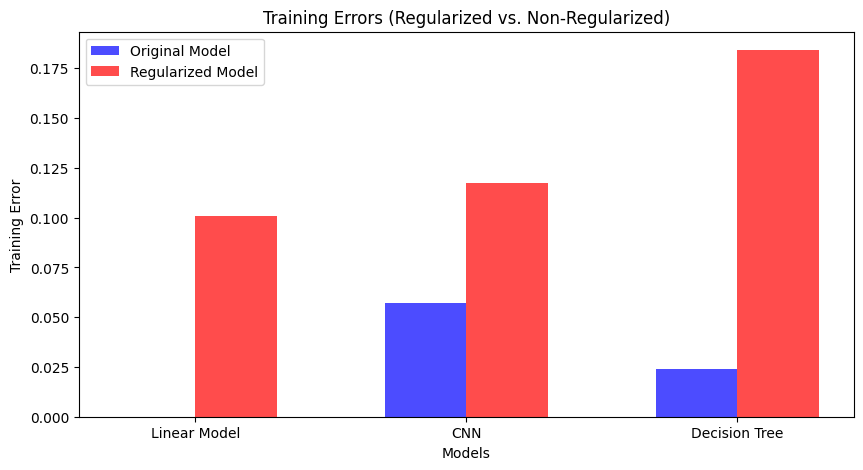

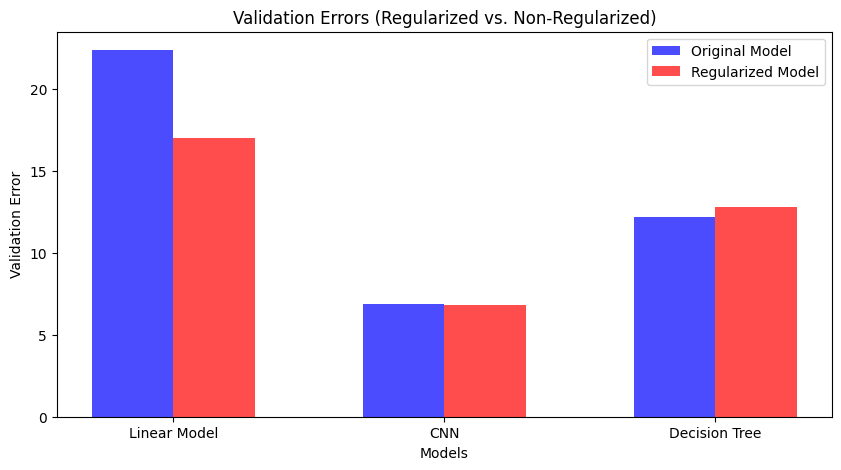

In [ ]:


# Define model names
models = ["Linear Model", "CNN", "Decision Tree"]

# Training errors
train_errors = [reg_train_error, cnn_train_error, tree_train_error]
custom_train_errors = [custom_reg_train_error, custom_cnn_train_error, custom_tree_train_error]

# Validation errors
val_errors = [reg_val_error, cnn_val_error, tree_val_error]
custom_val_errors = [custom_reg_val_error, custom_cnn_val_error, custom_tree_val_error]

# Create a DataFrame for better visualization
error_data = pd.DataFrame({
    "Model": models,
    "Training Error (Original)": train_errors,
    "Training Error (Regularized)": custom_train_errors,
    "Validation Error (Original)": val_errors,
    "Validation Error (Regularized)": custom_val_errors
})

# Print the table
print(error_data.to_string(index=False))

# Define x-axis positions for grouped bar charts
x = np.arange(len(models))  # Model positions
width = 0.3  # Bar width for better visualization

# Plot Training Errors
plt.figure(figsize=(10, 5))
plt.bar(x - width/2, train_errors, width, label='Original Model', color='blue', alpha=0.7)
plt.bar(x + width/2, custom_train_errors, width, label='Regularized Model', color='red', alpha=0.7)
plt.xlabel("Models")
plt.ylabel("Training Error")
plt.title("Training Errors (Regularized vs. Non-Regularized)")
plt.xticks(ticks=x, labels=models)
plt.legend()
plt.show()

# Plot Validation Errors
plt.figure(figsize=(10, 5))
plt.bar(x - width/2, val_errors, width, label='Original Model', color='blue', alpha=0.7)
plt.bar(x + width/2, custom_val_errors, width, label='Regularized Model', color='red', alpha=0.7)
plt.xlabel("Models")
plt.ylabel("Validation Error")
plt.title("Validation Errors (Regularized vs. Non-Regularized)")
plt.xticks(ticks=x, labels=models)
plt.legend()
plt.show()